In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import plotly.express as px

In [58]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Linear regression  

## Definition
Suppose $y = Xw + e$ and $Loss = \sum (y_i - yhat_i)^2 = \sum (y_i - Xw)^2$ 
## Assumptions

1. y is continuous.
2. Linear relationship between X and y.
3. Residual will follow normal distribution.
4. Expalatory variables are independent and identically distributed

## Learning approach
Parameter $w$ can be obtained by following ways.

1. Calculus  
Given data (X, y), Loss is a function of w and convex. So, when w is optimal, we can assume $\frac{\partial}{\partial w}(Loss) = 0$.  
Therefor,  

$$
\frac{\partial}{\partial w}(Loss) = \frac{\partial}{\partial w}\sum (y_i - Xw)^2 = 0 \\
= \begin{pmatrix}
\frac{\partial}{\partial w_1}(\sum (y_i - Xw)^2) \\
\frac{\partial}{\partial w_2}(\sum (y_i - Xw)^2) \\
... \\
\frac{\partial}{\partial w_k}(\sum (y_i - Xw)^2) \\
\end{pmatrix}
= \begin{pmatrix}
2 \sum (-1)(y_i - w_1 - w_2x_{i2} - ... w_kx_{ik}) \\
2 \sum (-x_{i2})(y_i - w_1 - w_2x_{i2} - ... w_kx_{ik}) \\
... \\
2 \sum (-x_{ik})(y_i - w_1 - w_2x_{i2} - ... w_kx_{ik}) \\
\end{pmatrix} \\
= -2(X^Ty - X^TXw) = 0 \\
X^Ty = X^TXw  \\
w = (X^TX)^{-1}X^Ty
$$

Python Code

In [59]:
df['CONSTANT'] = 1 # add constant for intercept
feat_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
             'DIS','RAD','TAX','PTRATIO','B','LSTAT', 'CONSTANT']
y = df[['PRICE']].values
X = df[feat_cols].values
w = np.linalg.inv(
    X.transpose().dot(X)
).dot(X.transpose()).dot(y) 

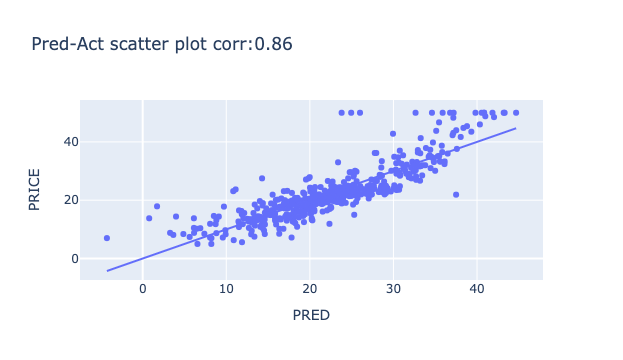

In [60]:
df['PRED'] = X.dot(w)
corr = df[['PRED','PRICE']].corr()['PRICE']['PRED'].round(2)
px.scatter(df, x='PRED', y='PRICE', trendline="ols", title='Pred-Act scatter plot corr:{}'.format(corr))

# Pros and cons 

* Pros
    - Can find a rigorously optimal solution.
    - No parameters required for learning.
    - Can be coded in one liner
* Cons
    - Computationaly richer than gradient descent (Can't process huge data)